In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

### Check Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Check statistical summary

In [5]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

### Check for null values

In [6]:
df.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

### Dropping irrelevant columns
- Dropping Number of Doors columns because it holds little to no relevance in usability of car

In [7]:
df = df.drop(['Number of Doors'], axis=1)

### Renaming columns

In [8]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

### Dropping duplicates and null values

In [9]:
print("DUPLICATES: ",df[df.duplicated()].shape)
print("NULL: \n",df.isnull().sum())

DUPLICATES:  (716, 15)
NULL: 
 Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Market Category     3742
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64


In [10]:
df = df.drop_duplicates()
df = df.dropna() 

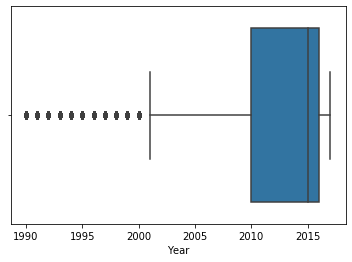

In [11]:
sns.boxplot(x=df['Year'])

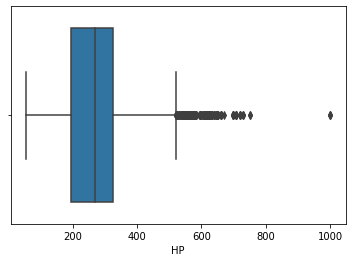

In [12]:
sns.boxplot(x=df['HP'])

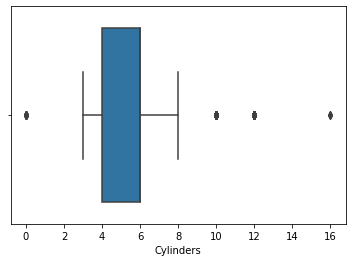

In [13]:
sns.boxplot(x=df['Cylinders'])

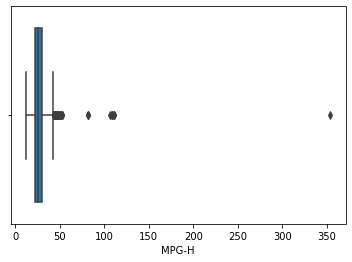

In [14]:
sns.boxplot(x=df['MPG-H'])

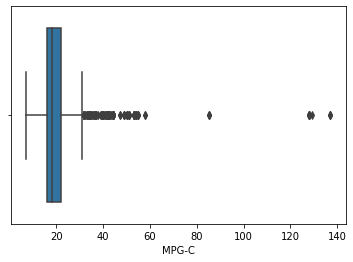

In [15]:
sns.boxplot(x=df['MPG-C'])

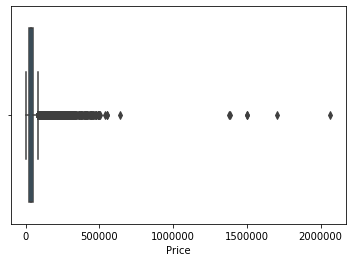

In [16]:
sns.boxplot(x=df['Price'])

### Calculate and remove outliers

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              4.0
HP              105.0
Cylinders         2.0
MPG-H             6.0
MPG-C             5.0
Popularity     1239.0
Price         18287.5
dtype: float64


In [20]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

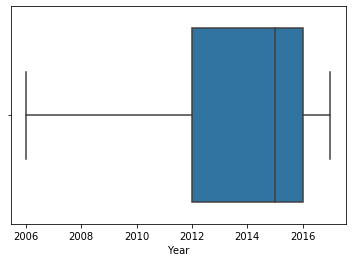

In [21]:
sns.boxplot(x=df['Year'])

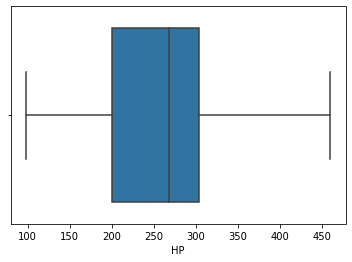

In [22]:
sns.boxplot(x=df['HP'])

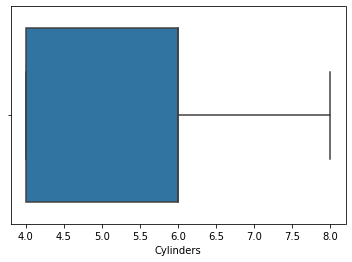

In [23]:
sns.boxplot(x=df['Cylinders'])

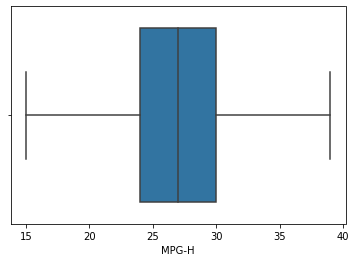

In [24]:
sns.boxplot(x=df['MPG-H'])

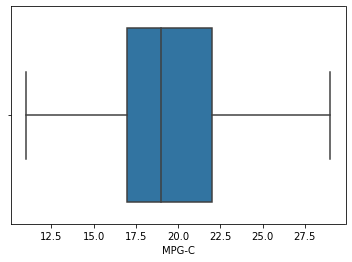

In [25]:
sns.boxplot(x=df['MPG-C'])

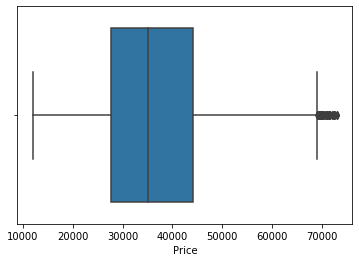

In [26]:
sns.boxplot(x=df['Price'])

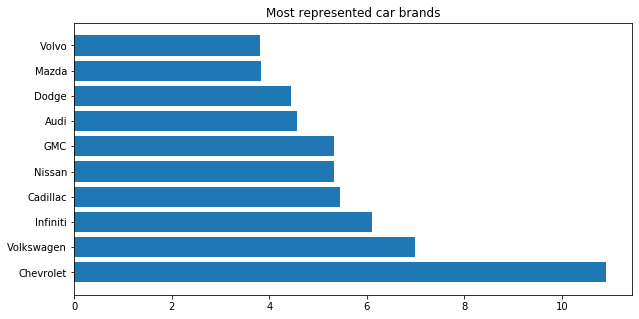

In [27]:
percent = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
popular_labels = percent.index[:10]
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=percent[:10])
plt.title('Most represented car brands')
plt.show()

In [28]:
avg_prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(avg_prices)

Price
Make                    
Chevrolet   35630.134875
Dodge       29659.693396
GMC         38889.389764
Honda       30169.723757
Mazda       26170.573770
Nissan      34551.791339
Toyota      35134.077381
Volkswagen  30022.117117


### Correlation Matrix

In [29]:
df.corr()

Year        HP  Cylinders     MPG-H     MPG-C  Popularity  \
Year        1.000000  0.070396  -0.212932  0.360129  0.339899    0.172482   
HP          0.070396  1.000000   0.775312 -0.566183 -0.653997    0.036430   
Cylinders  -0.212932  0.775312   1.000000 -0.726544 -0.767642    0.035882   
MPG-H       0.360129 -0.566183  -0.726544  1.000000  0.917722    0.030692   
MPG-C       0.339899 -0.653997  -0.767642  0.917722  1.000000    0.022061   
Popularity  0.172482  0.036430   0.035882  0.030692  0.022061    1.000000   
Price       0.202743  0.729709   0.473240 -0.288340 -0.358974    0.006329   

               Price  
Year        0.202743  
HP          0.729709  
Cylinders   0.473240  
MPG-H      -0.288340  
MPG-C      -0.358974  
Popularity  0.006329  
Price       1.000000

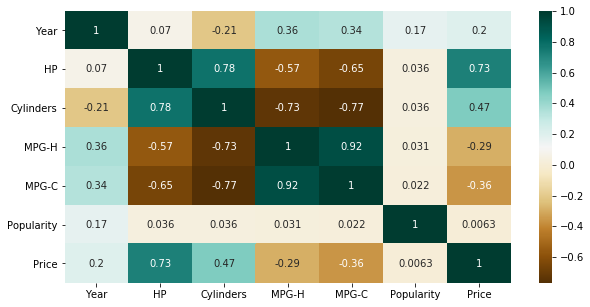

In [30]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

## Insights:
### High Correlation:
- HP and Cylinder
- HP and Price
- MPG-H and MPG-C
### High Negative Correlation:
- HP and (MPG-H/MPG-C)
- Cylinders and (MPG-H/MPG-C)

### Positive Correlation Scatter Plots

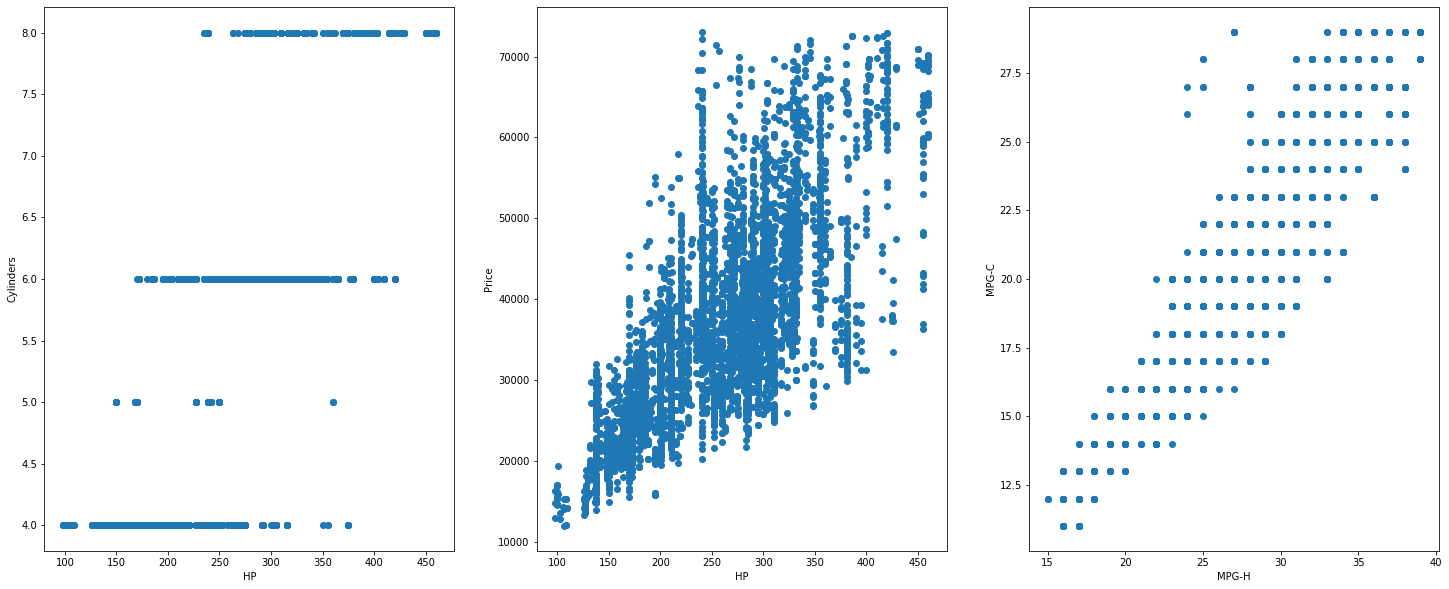

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))
ax[0].scatter(df['HP'], df['Cylinders'])
ax[0].set_xlabel('HP')
ax[0].set_ylabel('Cylinders')

ax[1].scatter(df['HP'], df['Price'])
ax[1].set_xlabel('HP')
ax[1].set_ylabel('Price')

ax[2].scatter(df['MPG-H'], df['MPG-C'])
ax[2].set_xlabel('MPG-H')
ax[2].set_ylabel('MPG-C')
plt.show()

### Negative Correlation Plots

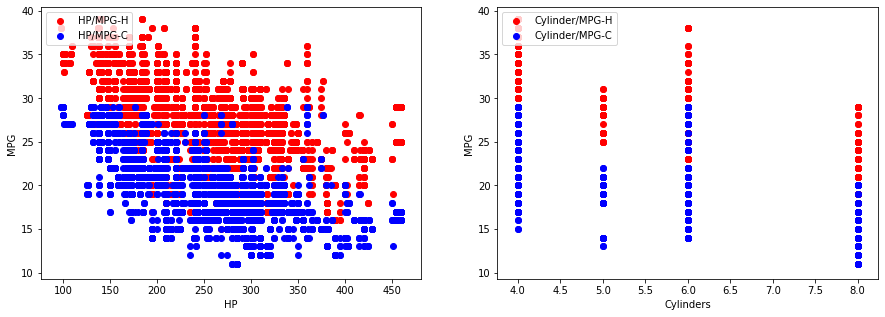

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].scatter(df['HP'], df['MPG-H'],color='red',label='HP/MPG-H')
ax[0].scatter(df['HP'], df['MPG-C'],color='blue',label='HP/MPG-C')
ax[0].set_xlabel('HP')
ax[0].set_ylabel('MPG')
ax[0].legend(loc="upper left")

ax[1].scatter(df['Cylinders'], df['MPG-H'],color='red',label='Cylinder/MPG-H')
ax[1].scatter(df['Cylinders'], df['MPG-C'],color='blue',label='Cylinder/MPG-C')
ax[1].set_xlabel('Cylinders')
ax[1].set_ylabel('MPG')
ax[1].legend(loc="upper left")
plt.show()